# XOR Problem

| x1 | x2 | result |
|----|----|--------|
| 0  | 0  | 0      |
| 0  | 1  | 1      |
| 1  | 0  | 1      |
| 1  | 1  | 0      |

## Import

In [1]:
import keras
import pydot
import pydotplus
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import layers

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


## Prepare Data

In [2]:
# Our data
X = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

print(X.shape)
print(y.shape)

(4, 2)
(4, 1)


In [3]:
# Apply transpose matrix
first_dim_X = [i[0] for i in X]
second_dim_X = [i[1] for i in X]

print(first_dim_X)
print(second_dim_X)

[0.0, 0.0, 1.0, 1.0]
[0.0, 1.0, 0.0, 1.0]


In [4]:
print(X.transpose()[0])
print(X.transpose()[1])

[0. 0. 1. 1.]
[0. 1. 0. 1.]


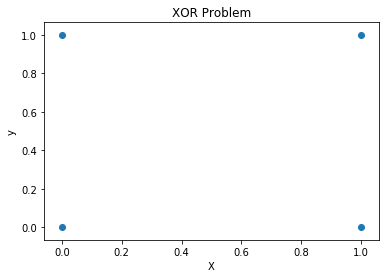

In [5]:
plt.scatter(first_dim_X, second_dim_X)
plt.title('XOR Problem')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Create Model

In [6]:
# Set random seed
np.random.seed(42)

tf.control_flow_ops = tf

# Building the model
xor = Sequential()
xor

## Build Network

In [7]:
xor.add(Dense(8, input_dim=2)) # 2 perceptrons
xor.add(Activation("tanh"))
xor.add(Dense(1))
xor.add(Activation("sigmoid"))

## Compile Model

In [8]:
xor.compile(loss="binary_crossentropy",
            optimizer=SGD(lr=0.1),
            metrics = ['accuracy'])

## Resume Network

In [9]:
xor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [10]:
# keras.utils.vis_utils.pydot = pydot
# plot_model(xor, to_file='../reports/model.png', show_shapes=True)

## Trainning Model

In [11]:
history = xor.fit(X, y, epochs=1000, verbose=0)
history

### Visualization Tranning

In [12]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


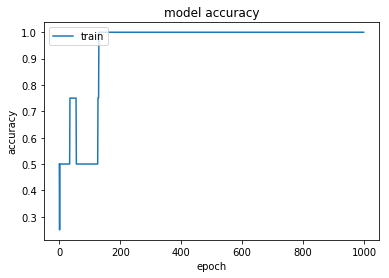

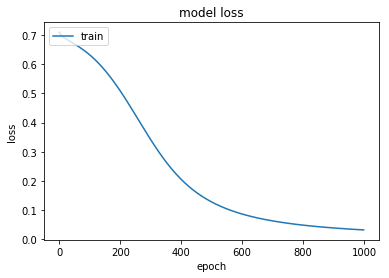

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluation Model

In [16]:
# Scoring the model
score = xor.evaluate(X, y)
print("\nAccuracy: ", score[-1])

4/4 [==============================] - 0s 205us/step

Accuracy:  1.0


## Predictions

In [17]:
print("\nPredictions:")
print(xor.predict_proba(X))


Predictions:
[[0.01462415]
 [0.9659067 ]
 [0.96667147]
 [0.0439393 ]]


---